In [1]:
import numpy as np

f = open("KE.txt", "r")

k_, k_2 = [],[]

line = f.readline()

while line != "": 

    k_.append(float(line.strip().split()[0]))

    k_2.append(float(line.strip().split()[1]))

    line = f.readline()

f.close()

k_ = np.array(k_)

k_2 = np.array(k_2)

In [2]:
def correlation(A): # computes the correlation function for a value A 

    import numpy as np # import numpy library 

    cA = [] # array of autocorrelation times

    cA_0 = 0 # variance at time = 0

    cA_bar = np.mean(np.array(A)) # mean value of A over entire time series

    ### Determine Variance at Time t = 0 ### 

    for i in range(len(A)): 

        cA_0 += (A[i]-cA_bar)**2 # computes sum over variance 
    
    cA_0 = cA_0/(len(A)-1) # divides by the number of samples
    
    for tau in range(len(A)-1): # loop through correlation times

        cA_ = 0 #autocorrelation value 

        for i in range(len(A) - tau):

                cA_ += (A[i]-cA_bar)*(A[i+tau]-cA_bar)
        
        cA_ = cA_ / (len(A) - tau) # normalize by the number of samples

        cA.append(np.array([tau,cA_/cA_0])) # append autocorrelation to array

    return np.array(cA)

In [3]:
def correlation_2(A): 

    import numpy as np

    cA = [] # array of autocorrelation times

    for tau in range(len(A)):  # loop through correlation times

        cA_ = 0 

        for a in (range(len(A) - tau)): # loop through max allowed values 

            cA_ += A[a]*A[a + tau] # compute the sum of products 
        
        cA_ = cA_/(len(A) - tau)
        
        cA.append(np.array([tau,cA_]))
    
    cA = np.array(cA)

    return cA

In [4]:
ke_autocorrelation_2 = correlation_2(k_2)

In [5]:
ke_autocorrelation =  correlation(k_)

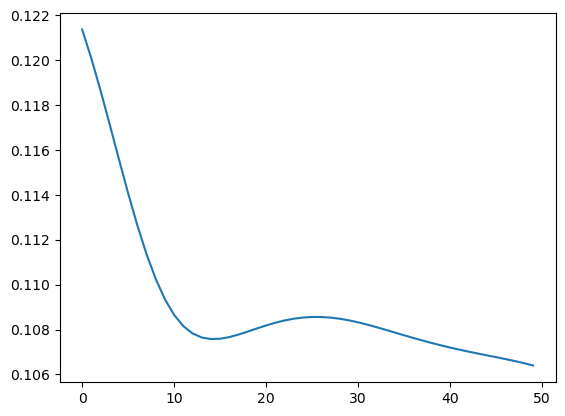

In [6]:
import matplotlib.pyplot as plt

plt.plot(ke_autocorrelation_2[:,0][:50], ke_autocorrelation_2[:,1][:50])

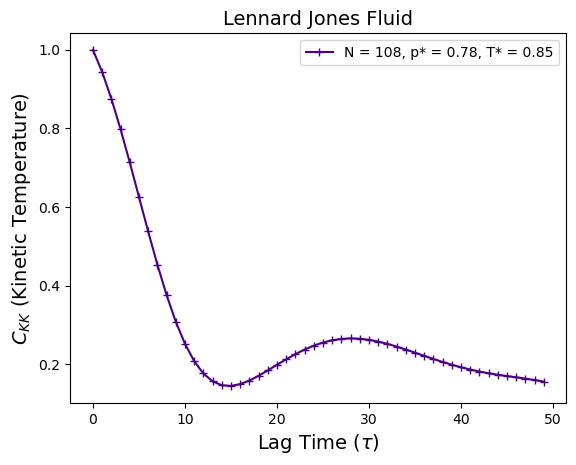

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(ke_autocorrelation[:,0][:50], ke_autocorrelation[:,1][:50], label = "N = 108, p* = 0.78, T* = 0.85", color = "indigo", marker = "+", linestyle = "-")
ax.set_xlabel(r"Lag Time $(\tau)$", fontsize = 14)
ax.set_ylabel(r"$C_{KK}$ (Kinetic Temperature)", fontsize = 14)
ax.set_title("Lennard Jones Fluid", fontsize = 14)
ax.legend()

In [126]:
import numpy as np 

N = 108 # number of LJ beads

nf = 100 # number of frames

L_min = np.zeros(3)-2.6 # negative box vectors (x,y,z)
L_max = np.zeros(3) + 2.6 # postive box vectors (x,y,z)

Vbox = (2.6*2)**3 # volume of the box

f = open("traj.txt", "r")

raw_traj = [] # unshaped container of trajectories

xyz = [] # container that will hold each frame 

line = f.readline()

while line != "":

    raw_traj.append(np.array(line.strip().split()).astype(float))

    line = f.readline()

f.close()

frame = []

for i in range(len(raw_traj)): 

    if (i+1)% 108 == 0 and (i != len(raw_traj)-1):

        frame.append(raw_traj[i]) 

        xyz.append(np.array(frame))

        frame = []
    
    elif i == (len(raw_traj)-1): 

        frame.append(raw_traj[i])

        xyz.append(np.array(frame))

        break

    else:

        frame.append(raw_traj[i]) 

xyz = np.array(xyz)

nbins = 200

bin_width = 2.6/nbins # the maximum length we will measure is L/

hist = np.zeros(nbins)

for i in xyz: # loop through the frames

    dr = [] # this will be our pairwise separation container 

    for r in range(108): # loop through the rows of the frame matrix

        for c in range(r+1,108):# loop through column nums that > row num

            if np.linalg.norm(i[r] - i[c]) > 2.6: # half box length = 2.6

                dr.append(5.2 - np.linalg.norm(i[r] - i[c])) # checks for min_img convention
            
            else: 

                dr.append(np.linalg.norm(i[r] - i[c]))
    
    # now we need to loop through dr and assign its value to the bin
    
    dr = np.array(dr)

    dr = np.floor(dr/bin_width).astype(int) # gives the index of the bin that the pair separation falls in

    for b_i in dr: 

        hist[b_i] += 1 # we iterate through our dr and add 2 to the corresponding bin

# now we need to normalize our histogram and compure g(r)

g = [] # radial distribution function

r = []

for i in range(len(hist)): 

    if i < len(hist) -1: 

        volume_bin = (4/3)*np.pi*((bin_width)**3)*((i+1)**3 - i**3) # volume of spherical shell

        Prob = hist[i]/(N*(N-1)*(1/2)*nf) # probability of observing the prescribe density
       
        g.append(Prob*(Vbox/(volume_bin*N))) # radial distribution function assuming 1 atom in shell and vol
                                             # occupied by a single atom in the bulk
        r.append((bin_width/2)*(i+1 + i)) # append the midpoint of the bin 

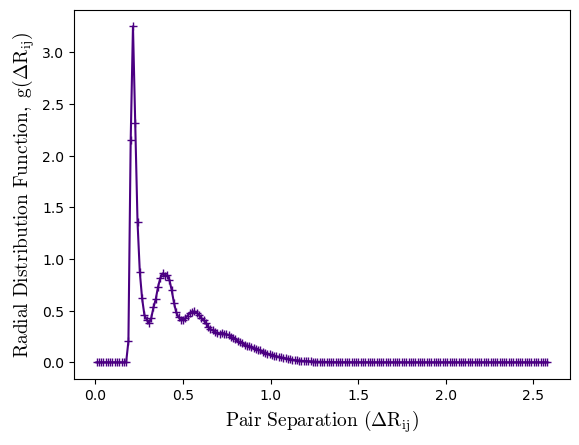

In [127]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'cm'

fig,ax = plt.subplots()

ax.set_xlabel(r'$\rm{Pair \,\, Separation \,\,(\Delta R_{ij})}$', fontsize = 14)
ax.set_ylabel(r'$\rm{Radial \,\,Distribution \,\,Function,\,\, g(\Delta R_{ij})}$', fontsize =14)

ax.plot(r,g,color = 'indigo', marker = "+", linestyle= "-")